In [1]:
import numpy as np
import json

In [2]:
import sys
import pathlib
sys.path.append(pathlib.Path().absolute().parent.as_posix())

In [3]:
from functions.dynamics_functions import psi_function 
from functions.trajectories import *
from functions.set_objects_from_data import *
from functions.plot_functions import *

from classes.EmpData import Data


## Set final year

In [21]:
T = 2050

# A: regular and occasional speakers

## A1: Full sample

### Version 1:  Start at 1998 with estimated numbers
* Constant model
* relative migration

In [4]:
# set parameters
# set parameters
with open("data/parameters_1998.json", "r") as file: # 2014 and 1998 parameters are identical
    params = json.load(file) 

with open("data/data_1998.json", "r") as file:
    data = json.load(file)


parameters_1998 = get_params(params)
data_1998 = get_emp_data(data)

In [5]:
parameters_1998.print_params()

lam = 0.008
mu = 0.011

nu = 0.0066
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.    0.45  0.    0.    0.074]
 [0.    0.    1.    1.    0.   ]
 [0.    0.55  0.    0.    0.926]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [6]:
data_1998.print_data()

xH =
[0.316 0.396]
xL =
[0 0]
xB =
[0.684 0.604]
years
[1998 2014]


In [8]:
traj_1998 = trajectory(T, parameters_1998, data_1998)

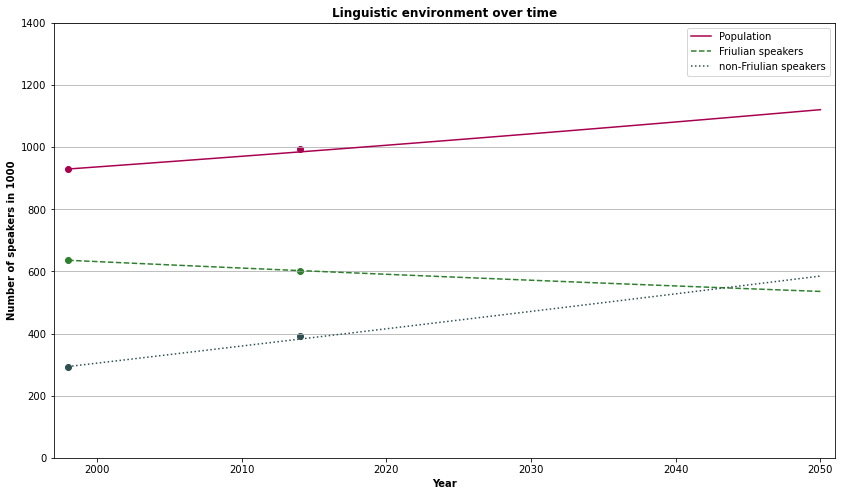

In [9]:
# Absolute numbers
plot_trajectory(traj_1998, 
                data_1998,
                "Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_1998.png")

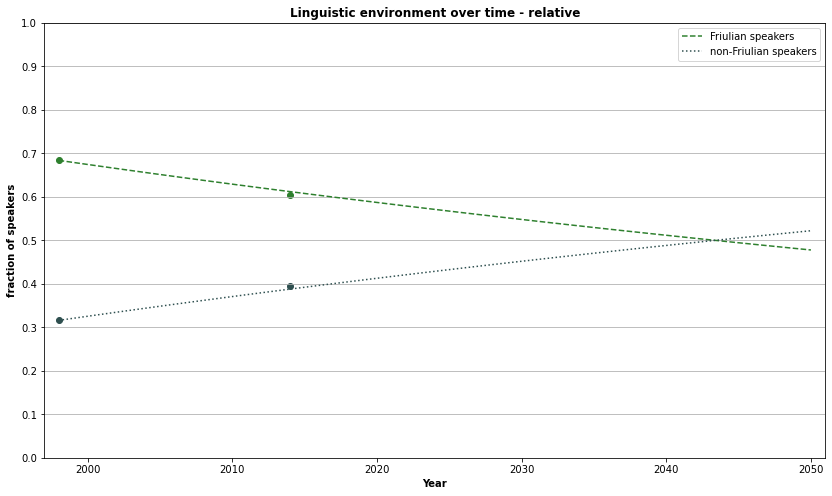

In [10]:
plot_trajectory_relative(traj_1998, data_1998,"Friulian",fname="plots/full_relative_1998.png")

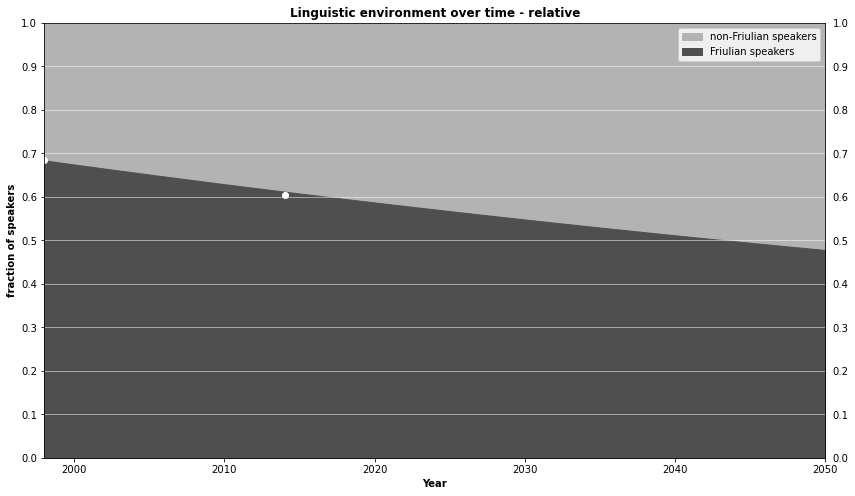

In [11]:
plot_trajectory_relative_fill(traj_1998, 
                              data_1998,
                              "Friulian",
                              fname="plots/full_relative_fill_1998.png")

### Version 2: Start at 2014

In [12]:
# set parameters
with open("data/parameters_2014.json", "r") as file: # 2014 and 1998 parameters are identical
    params = json.load(file) 


with open("data/data_2014.json", "r") as file:
    data_full_2014 = json.load(file)

data_2014 = get_emp_data(data_full_2014)
parameters_2014 = get_params(params)

In [13]:
traj_2014 = trajectory(T, parameters_2014, data_2014)

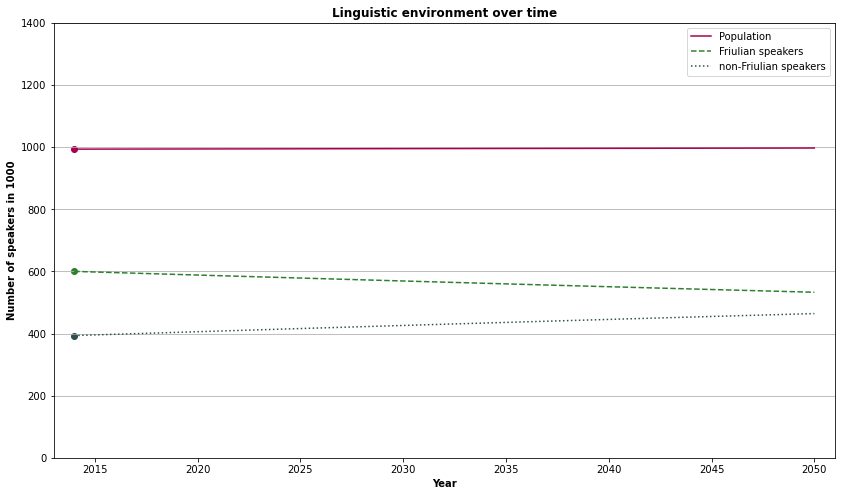

In [14]:
plot_trajectory(traj_2014, 
                data_2014, 
                "Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_2014.png")

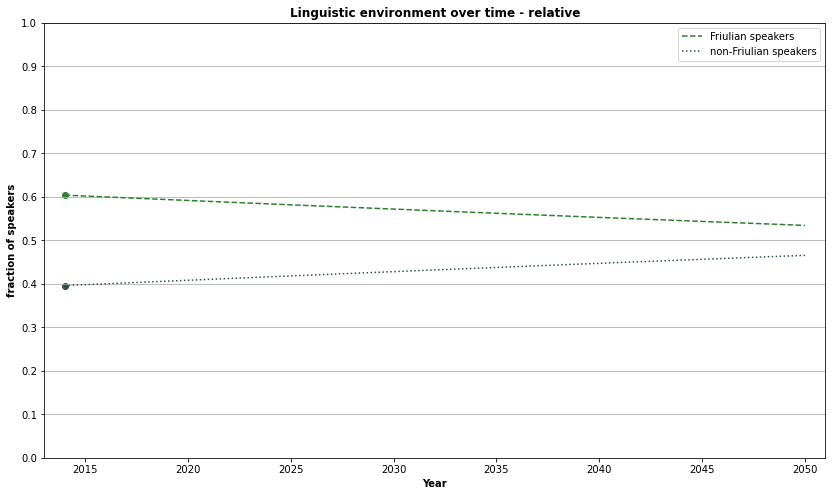

In [15]:
plot_trajectory_relative(traj_2014, 
                         data_2014,
                         "Friulian")#,
                         #fname="plots/full_relative_2014.png")

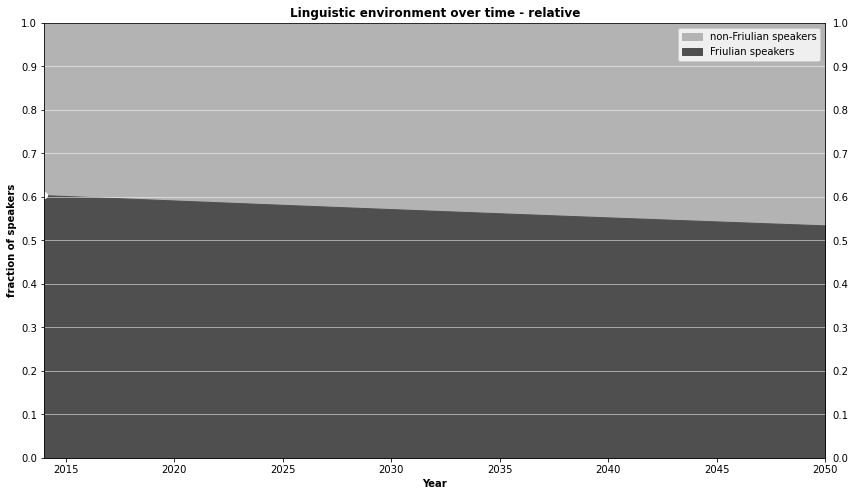

In [16]:
plot_trajectory_relative_fill(traj_2014, 
                              data_2014,
                              "Friulian",
                              fname="plots/full_relative_fill_2014.png")

## A2: Old sample

In [17]:
# set parameters
   
with open("data/data_old.json", "r") as file:
    data = json.load(file)
    
data_old = get_emp_data(data)

In [18]:
data_old.print_data()

xH =
[0.225 0.325]
xL =
[0 0]
xB =
[0.775 0.675]
years
[1998 2014]


**relative**

In [19]:
traj_old = trajectory_rel(T, parameters_1998, data_old)

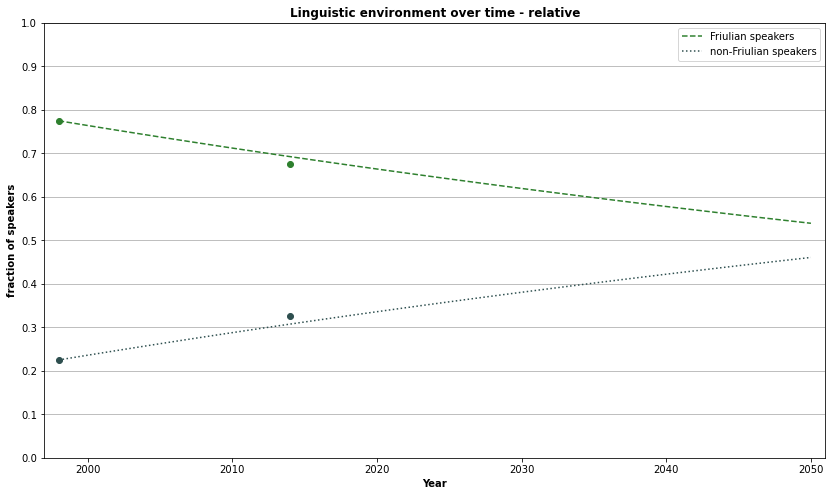

In [20]:
plot_trajectory_relative(traj_old, 
                         data_old,
                         "Friulian",
                         fname="plots/old_relative_all.png")

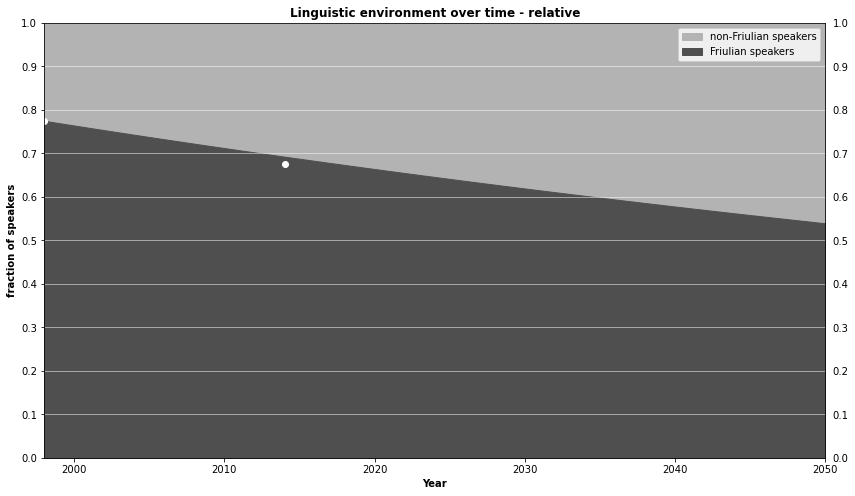

In [21]:
plot_trajectory_relative_fill(traj_old, 
                              data_old,
                              "Friulian",
                              fname="plots/old_relative_filled_all.png")

## A3: Comparison of the models at final time

In [79]:
traj_1998_end = np.array(traj_1998[1:,-1])
traj_1998_end_rel = traj_1998_end/sum(traj_1998_end)

traj_2014_end = np.array(traj_2014[1:,-1])
traj_2014_end_rel = traj_2014_end/sum(traj_2014_end)

traj_2014_start = np.array(traj_2014[1:,0])
traj_2014_start_rel = traj_2014_start/sum(traj_2014_start)


traj_old_end_rel = np.array(traj_old[1:,-1])

In [82]:
print("2014")
print(f"   N = {traj_2014_start[0]+traj_2014_start[2] :0.0f}")
print(f"   NB = {traj_2014_start[2] :0.0f}")
print(f"   NH = {traj_2014_start[0] :0.0f}")
print(f"   xB = {traj_2014_start_rel[2] :0.3f}")
print(f"   xH = {traj_2014_start_rel[0] :0.3f}")


print("")
print(f"Full sample, start 1998")
print("")
print(" 2030")
print(f"   NB = {traj_1998[3,32] :0.0f}")
print(f"   NH = {traj_1998[1,32] :0.0f}")
print(f"   xB = {traj_1998[3,32]/(traj_1998[3,32]+traj_1998[1,32]) :0.3f}")
print(f"   xH = {traj_1998[1,32]/(traj_1998[3,32]+traj_1998[1,32]) :0.3f}")



print("")
print(f" {T}")
print(f"   N = {traj_1998_end[0]+traj_1998_end[2] :0.0f}")
print(f"   NB = {traj_1998_end[2] :0.0f}")
print(f"   NH = {traj_1998_end[0] :0.0f}")
print(f"   xB = {traj_1998_end_rel[2] :0.3f}")
print(f"   xH = {traj_1998_end_rel[0] :0.3f}")



print("")
print(f"Full sample, start 2014")
print("")
print(" 2030")
print(f"   NB = {traj_2014[3,16] :0.0f}")
print(f"   NH = {traj_2014[1,16] :0.0f}")
print(f"   xB = {traj_2014[3,16]/(traj_2014[3,32]+traj_2014[1,32]) :0.3f}")
print(f"   xH = {traj_2014[1,16]/(traj_2014[3,32]+traj_2014[1,32]) :0.3f}")


print("")
print(f" {T}")
print(f"   N = {traj_2014_end[0]+traj_2014_end[2] :0.0f}")
print(f"   NB = {traj_2014_end[2] :0.0f}")
print(f"   NH = {traj_2014_end[0] :0.0f}")
print(f"   xB = {traj_2014_end_rel[2] :0.3f}")
print(f"   xH = {traj_2014_end_rel[0] :0.3f}")

print("")
print(f" Old sample")
print(f"   xB = {traj_old_end_rel[2] :0.3f}")
print(f"   xH = {traj_old_end_rel[0] :0.3f}")





2014
   N = 993663
   NB = 600172
   NH = 393491
   xB = 0.604
   xH = 0.396

Full sample, start 1998

 2030
   NB = 571643
   NH = 471364
   xB = 0.548
   xH = 0.452

 2050
   N = 1120728
   NB = 535572
   NH = 585156
   xB = 0.478
   xH = 0.522

Full sample, start 2014

 2030
   NB = 569203
   NH = 426051
   xB = 0.571
   xH = 0.427

 2050
   N = 997246
   NB = 532988
   NH = 464259
   xB = 0.534
   xH = 0.466

 Old sample
   xB = 0.539
   xH = 0.461


**adjusting projection from "old sample" with 1998, 2014 data**

In [25]:
print("")
print(f" Version old - adjusted with empirical fraction from 1998")
print(f"   xB = {traj_old_end_rel[2]*data_1998.Rel.xB[0]/data_old.Rel.xB[1]}")
print(f"   xH = {1-traj_old_end_rel[2]*data_1998.Rel.xB[0]/data_old.Rel.xB[1]}")

print("")
print(f" Version old - adjusted with empirical fraction from 2014")
print(f"   xB = {traj_old_end_rel[2]*data_2014.Rel.xB[0]/data_old.Rel.xB[1]}")
print(f"   xH = {1-traj_old_end_rel[2]*data_2014.Rel.xB[0]/data_old.Rel.xB[1]}")


 Version old - adjusted with empirical fraction from 1998
   xB = 0.546461322913603
   xH = 0.45353867708639695

 Version old - adjusted with empirical fraction from 2014
   xB = 0.4825477178944682
   xH = 0.5174522821055318


## A4: Analysis for individual provinces

### Udine

In [26]:
# set parameters
with open("data/data_udine_2014.json", "r") as file:
    data_udine_2014 = json.load(file)

data_udine = get_emp_data(data_udine_2014)

traj_udine = trajectory(T, parameters_2014, data_udine)

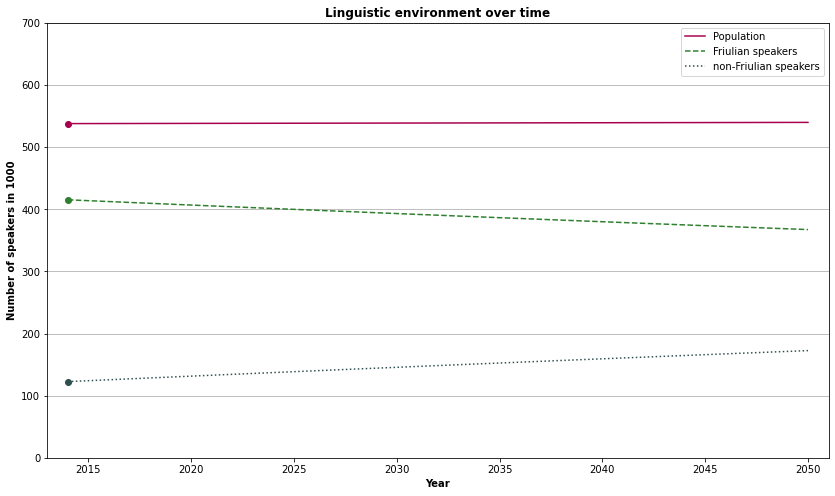

In [27]:
plot_trajectory(traj_udine, 
                data_udine,
                "Friulian",
                y_scaling = 1000, 
                y_lim = 700000,
                fname = "plots/absolute_udine.png")

### Pordenone

In [28]:
# set parameters
with open("data/data_pordenone_2014.json", "r") as file:
    data_pordenone_2014 = json.load(file)

data_pordenone = get_emp_data(data_pordenone_2014)

traj_pordenone = trajectory(T, parameters_2014, data_pordenone)

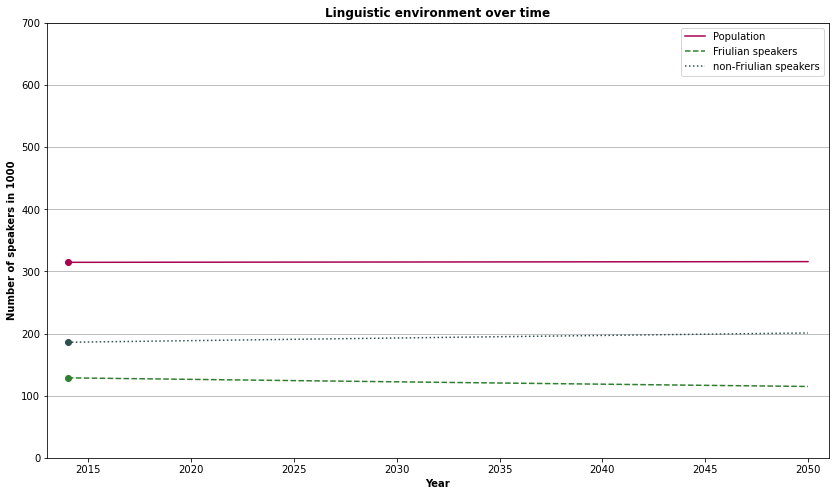

In [29]:
plot_trajectory(traj_pordenone,
                data_pordenone,
                "Friulian",
                y_scaling = 1000,
                y_lim = 700000,
                fname = "plots/absolute_pordenone.png")

### Gorizia

In [30]:
# set parameters
with open("data/data_gorizia_2014.json", "r") as file:
    data_gorizia_2014 = json.load(file)

data_gorizia = get_emp_data(data_gorizia_2014)

traj_gorizia = trajectory(T, parameters_2014, data_gorizia)

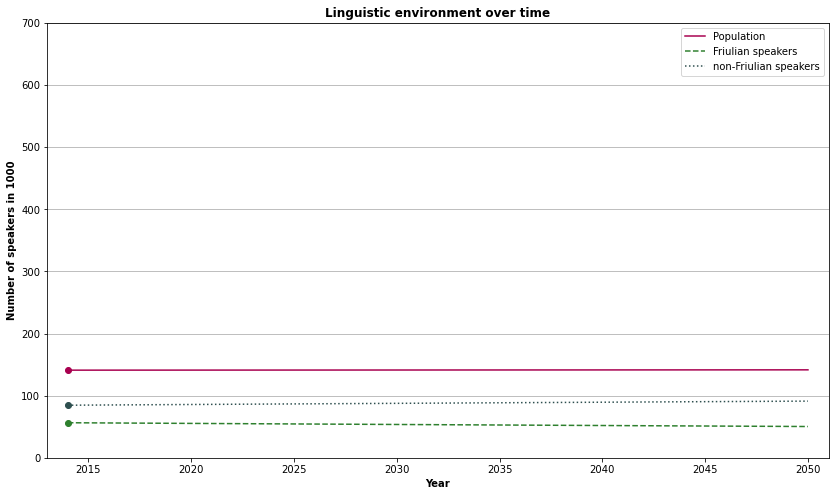

In [31]:
plot_trajectory(traj_gorizia, 
                data_gorizia,
                "Friulian",
                y_scaling = 1000,
                y_lim = 700000,
                fname = "plots/absolute_gorizia.png")

### Comparison

In [32]:
udine_start  = np.array(traj_udine[1:,0])
udine_end = np.array(traj_udine[1:,-1])

pordenone_start  = np.array(traj_pordenone[1:,0])
pordenone_end = np.array(traj_pordenone[1:,-1])

gorizia_start = np.array(traj_gorizia[1:,0])
gorizia_end = np.array(traj_gorizia[1:,-1])

total_start = udine_start + pordenone_start + gorizia_start
total_end = udine_end + pordenone_end + gorizia_end


In [33]:
print("")
print("Udine")
print("  2014")
print(f"   N = {udine_start[2]+udine_start[0] :0.0f}")
print(f"   NB = {udine_start[2] :0.0f}")
print(f"   NH = {udine_start[0] :0.0f}")
print(f"   xB = {udine_start[2]/(udine_start[0]+udine_start[2]) :0.3f}")
print(f"   xH = {udine_start[0]/(udine_start[0]+udine_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {udine_end[2]+udine_end[0] :0.0f}")
print(f"   NB = {udine_end[2] :0.0f}")
print(f"   NH = {udine_end[0] :0.0f}")
print(f"   xB = {udine_end[2]/(udine_end[0]+udine_end[2]) :0.3f}")
print(f"   xH = {udine_end[0]/(udine_end[0]+udine_end[2]) :0.3f}")


Udine
  2014
   N = 537943
   NB = 415292
   NH = 122651
   xB = 0.772
   xH = 0.228

  2050
   N = 539883
   NB = 367351
   NH = 172532
   xB = 0.680
   xH = 0.320


In [85]:
1-367/415

0.11566265060240966

In [34]:
print("pordenone")
print("  2014")
print(f"   N = {pordenone_start[2]+pordenone_start[0] :0.0f}")
print(f"   NB = {pordenone_start[2] :0.0f}")
print(f"   NH = {pordenone_start[0] :0.0f}")
print(f"   xB = {pordenone_start[2]/(pordenone_start[0]+pordenone_start[2]) :0.3f}")
print(f"   xH = {pordenone_start[0]/(pordenone_start[0]+pordenone_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {pordenone_end[2]+pordenone_end[0] :0.0f}")
print(f"   NB = {pordenone_end[2] :0.0f}")
print(f"   NH = {pordenone_end[0] :0.0f}")
print(f"   xB = {pordenone_end[2]/(pordenone_end[0]+pordenone_end[2]) :0.3f}")
print(f"   xH = {pordenone_end[0]/(pordenone_end[0]+pordenone_end[2]) :0.3f}")

pordenone
  2014
   N = 314644
   NB = 128689
   NH = 185955
   xB = 0.409
   xH = 0.591

  2050
   N = 315779
   NB = 114810
   NH = 200968
   xB = 0.364
   xH = 0.636


In [90]:
1-323/421

0.2327790973871734

In [35]:
print("gorizia")
print("  2014")
print(f"   N = {gorizia_start[2]+gorizia_start[0] :0.0f}")
print(f"   NB = {gorizia_start[2] :0.0f}")
print(f"   NH = {gorizia_start[0] :0.0f}")
print(f"   xB = {gorizia_start[2]/(gorizia_start[0]+gorizia_start[2]) :0.3f}")
print(f"   xH = {gorizia_start[0]/(gorizia_start[0]+gorizia_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {gorizia_end[2]+gorizia_end[0] :0.0f}")
print(f"   NB = {gorizia_end[2] :0.0f}")
print(f"   NH = {gorizia_end[0] :0.0f}")
print(f"   xB = {gorizia_end[2]/(gorizia_end[0]+gorizia_end[2]) :0.3f}")
print(f"   xH = {gorizia_end[0]/(gorizia_end[0]+gorizia_end[2]) :0.3f}")

gorizia
  2014
   N = 141076
   NB = 56430
   NH = 84646
   xB = 0.400
   xH = 0.600

  2050
   N = 141585
   NB = 50355
   NH = 91230
   xB = 0.356
   xH = 0.644


In [36]:
print("TOTAL")
print("  2014")
print(f"   N = {total_start[0]+total_start[2] :0.0f}")
print(f"   NB = {total_start[2] :0.0f}")
print(f"   NH = {total_start[0] :0.0f}")
print(f"   xB = {total_start[2]/(total_start[0]+total_start[2]) :0.3f}")
print(f"   xH = {total_start[0]/(total_start[0]+total_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {total_end[2]+total_end[0] :0.0f}")
print(f"   NB = {total_end[2] :0.0f}")
print(f"   NH = {total_end[0] :0.0f}")
print(f"   xB = {total_end[2]/(total_end[0]+total_end[2]) :0.3f}")
print(f"   xH = {total_end[0]/(total_end[0]+total_end[2]) :0.3f}")

TOTAL
  2014
   N = 993663
   NB = 600412
   NH = 393251
   xB = 0.604
   xH = 0.396

  2050
   N = 997246
   NB = 532516
   NH = 464730
   xB = 0.534
   xH = 0.466


# B: Only regular speakers

## B1: Full sample

### Start in 1998

In [28]:
# set parameters
# set parameters
with open("data/parameters_regular_1998.json", "r") as file:
    params = json.load(file) 

with open("data/data_1998_regular.json", "r") as file:
    data = json.load(file)


parameters_1998_regular = get_params(params)
data_1998_regular = get_emp_data(data)

In [29]:
parameters_1998_regular.print_params()

lam = 0.008
mu = 0.011

nu = 0.0066
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.   1.   0.   0.   0.33]
 [0.   0.   1.   1.   0.  ]
 [0.   0.   0.   0.   0.67]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [30]:
traj_1998_regular = trajectory(T, parameters_1998_regular, data_1998_regular)

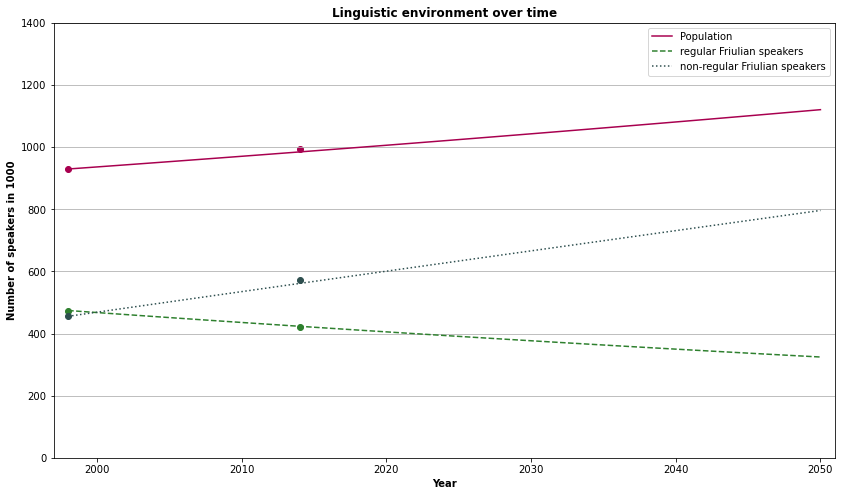

In [31]:
# Absolute numbers
plot_trajectory(traj_1998_regular, 
                data_1998_regular,
                "regular Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_1998_regular.png")

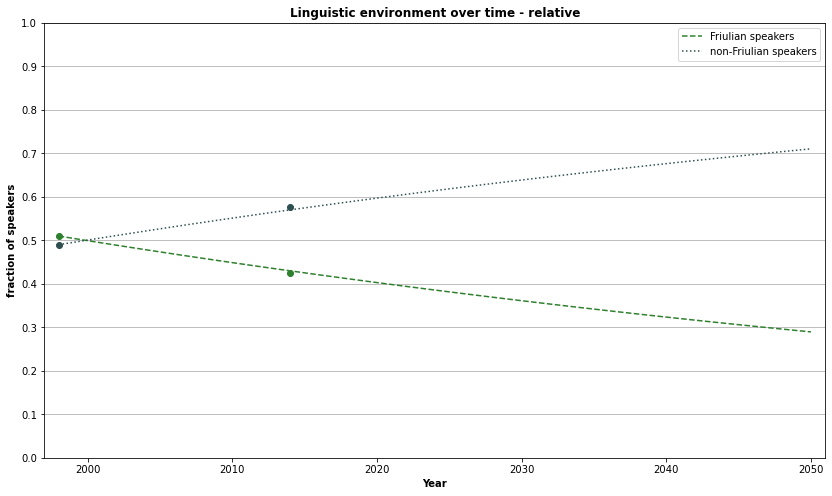

In [32]:
plot_trajectory_relative(traj_1998_regular, 
                         data_1998_regular,
                         "Friulian",
                         fname="plots/full_relative_1998_regular.png")

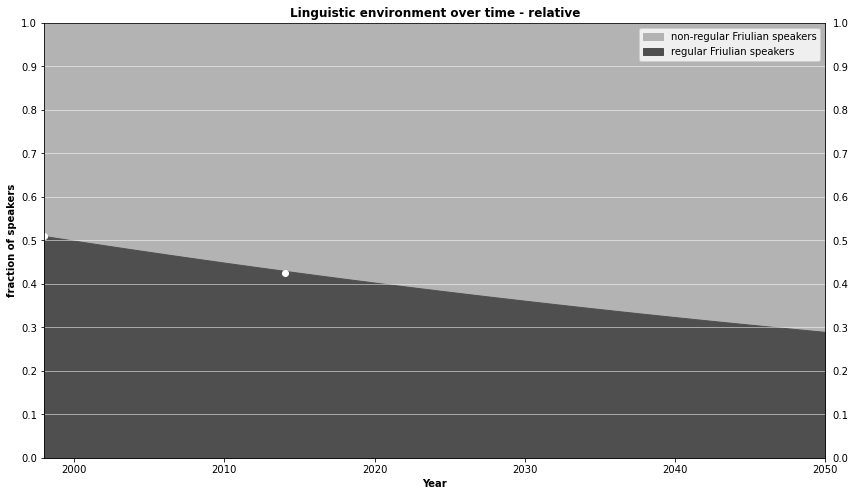

In [33]:
plot_trajectory_relative_fill(traj_1998_regular, 
                              data_1998_regular,
                              "regular Friulian",
                              fname="plots/full_relative_fill_1998_regular.png")

### Start in 2014

In [34]:
# set parameters
# set parameters
with open("data/parameters_regular_2014.json", "r") as file:
    params = json.load(file) 

with open("data/data_2014_regular.json", "r") as file:
    data = json.load(file)


parameters_regular_2014 = get_params(params)
data_2014_regular = get_emp_data(data)

In [35]:
parameters_regular_2014.print_params()
data_2014_regular.print_data()

lam = 0.008
mu = 0.011

nu = 0.0031
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.   1.   0.   0.   0.33]
 [0.   0.   1.   1.   0.  ]
 [0.   0.   0.   0.   0.67]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0
xH =
[0.576]
xL =
[0]
xB =
[0.424]
years
[2014]


In [36]:
traj_2014_regular = trajectory(T, parameters_regular_2014, data_2014_regular)

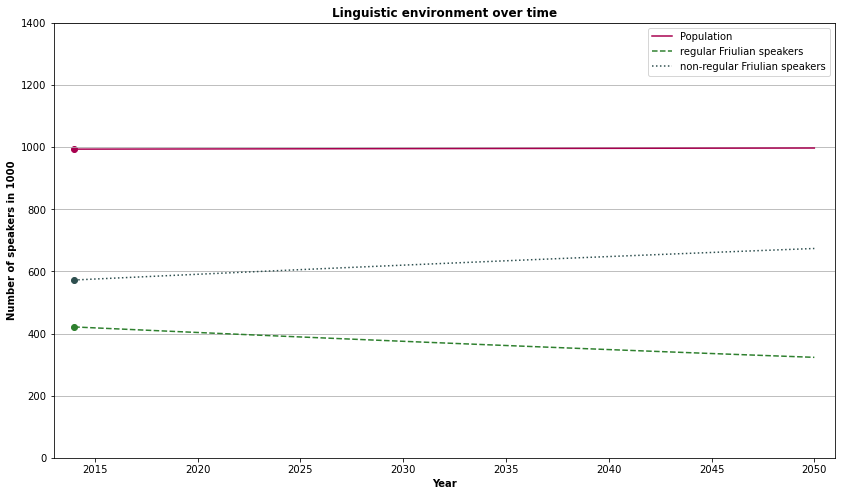

In [37]:
# Absolute numbers
plot_trajectory(traj_2014_regular, 
                data_2014_regular,
                "regular Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_2014_regular.png")

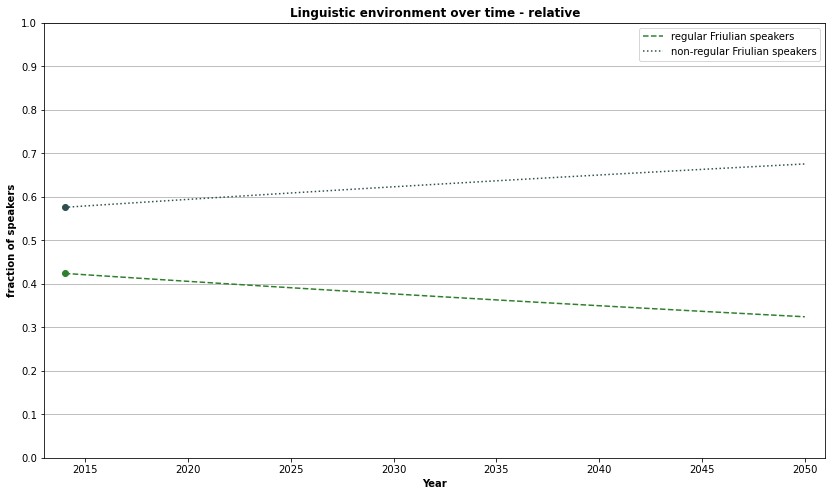

In [38]:
plot_trajectory_relative(traj_2014_regular, 
                data_2014_regular,
                "regular Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_relative_2014_regular.png")

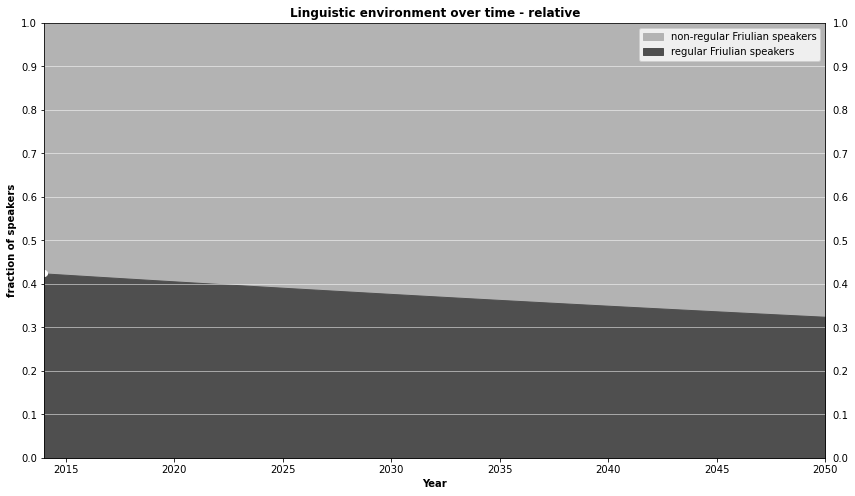

In [39]:
plot_trajectory_relative_fill(traj_2014_regular, 
                                data_2014_regular,
                                "regular Friulian",
                                y_scaling = 1000, 
                                y_lim = 1400000,
                                fname="plots/full_relative_fill_2014_regular.png")

#### start in 2014 - positive s_HB

In [40]:
parameters_regular_2014_sHBpos = parameters_regular_2014

In [49]:
parameters_regular_2014_sHBpos.s.sHB = 0.15
parameters_regular_2014_sHBpos.print_params()

lam = 0.008
mu = 0.011

nu = 0.0031
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.   1.   0.   0.   0.33]
 [0.   0.   1.   1.   0.  ]
 [0.   0.   0.   0.   0.67]]

sHB = 0.15
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [50]:
traj_2014_regular_sHBpos = trajectory(T, parameters_regular_2014_sHBpos, data_2014_regular)

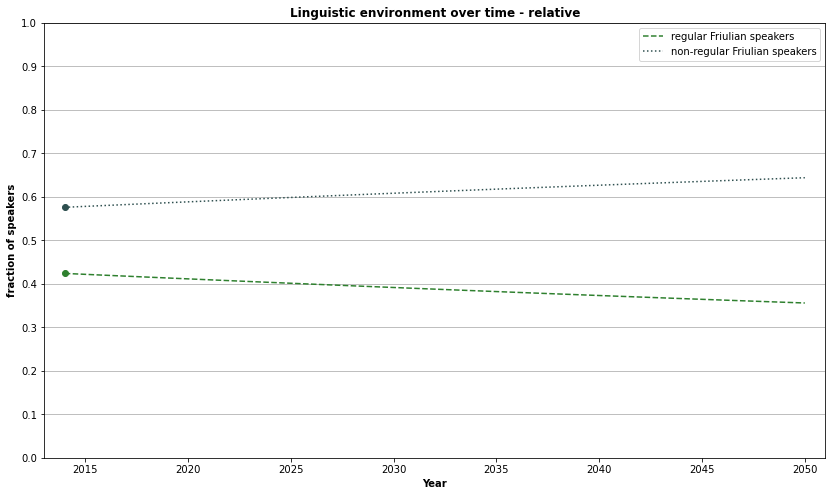

In [51]:
plot_trajectory_relative(traj_2014_regular_sHBpos, 
                data_2014_regular,
                "regular Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_relative_2014_regular_sHBpos.png")

### comparison

In [52]:
traj_1998_end = np.array(traj_1998_regular[1:,-1])
traj_1998_end_rel = traj_1998_end/sum(traj_1998_end)

traj_2014_end = np.array(traj_2014_regular[1:,-1])
traj_2014_end_rel = traj_2014_end/sum(traj_2014_end)

traj_2014_end_sHBpos = np.array(traj_2014_regular_sHBpos[1:,-1])
traj_2014_end_rel_sHBpos = traj_2014_end_sHBpos/sum(traj_2014_end_sHBpos)

traj_2014_start = np.array(traj_2014_regular[1:,0])
traj_2014_start_rel = traj_2014_start/sum(traj_2014_start)

print("2014")
print(f"   N = {traj_2014_start[0]+traj_2014_start[2] :0.0f}")
print(f"   NB = {traj_2014_start[2] :0.0f}")
print(f"   NH = {traj_2014_start[0] :0.0f}")
print(f"   xB = {traj_2014_start_rel[2] :0.3f}")
print(f"   xH = {traj_2014_start_rel[0] :0.3f}")


print("")
print(f"Full sample, start 1998, regular")
print("")
print(" 2030")
print(f"   NB = {traj_1998_regular[3,32] :0.0f}")
print(f"   NH = {traj_1998_regular[1,32] :0.0f}")
print(f"   xB = {traj_1998_regular[3,32]/(traj_1998_regular[3,32]+traj_1998_regular[1,32]) :0.3f}")
print(f"   xH = {traj_1998_regular[1,32]/(traj_1998_regular[3,32]+traj_1998_regular[1,32]) :0.3f}")





print("")
print(f" {T}")
print(f"   N = {traj_1998_end[0]+traj_1998_end[2] :0.0f}")
print(f"   NB = {traj_1998_end[2] :0.0f}")
print(f"   NH = {traj_1998_end[0] :0.0f}")
print(f"   xB = {traj_1998_end_rel[2] :0.3f}")
print(f"   xH = {traj_1998_end_rel[0] :0.3f}")



print("")
print(f"Full sample, start 2014, regular")
print("")
print(" 2030")
print(f"   NB = {traj_2014_regular[3,16] :0.0f}")
print(f"   NH = {traj_2014_regular[1,16] :0.0f}")
print(f"   NB = {traj_2014_regular[3,16]/(traj_2014_regular[3,16]+traj_2014_regular[1,16]) :0.3f}")
print(f"   NH = {traj_2014_regular[1,16]/(traj_2014_regular[3,16]+traj_2014_regular[1,16]) :0.3f}")

print("")
print(f" {T}")
print(f"   N = {traj_2014_end[0]+traj_2014_end[2] :0.0f}")
print(f"   NB = {traj_2014_end[2] :0.0f}")
print(f"   NH = {traj_2014_end[0] :0.0f}")
print(f"   xB = {traj_2014_end_rel[2] :0.3f}")
print(f"   xH = {traj_2014_end_rel[0] :0.3f}")

print("")
print(f"Full sample, start 2014, regular, sHB positive")
print("")
print(" 2030")
print(f"   NB = {traj_2014_regular_sHBpos[3,16] :0.0f}")
print(f"   NH = {traj_2014_regular_sHBpos[1,16] :0.0f}")
print(f"   NB = {traj_2014_regular_sHBpos[3,16]/(traj_2014_regular_sHBpos[3,16]+traj_2014_regular_sHBpos[1,16]) :0.3f}")
print(f"   NH = {traj_2014_regular_sHBpos[1,16]/(traj_2014_regular_sHBpos[3,16]+traj_2014_regular_sHBpos[1,16]) :0.3f}")

print("")
print(f" {T}")
print(f"   N = {traj_2014_end_sHBpos[0]+traj_2014_end_sHBpos[2] :0.0f}")
print(f"   NB = {traj_2014_end_sHBpos[2] :0.0f}")
print(f"   NH = {traj_2014_end_sHBpos[0] :0.0f}")
print(f"   xB = {traj_2014_end_rel_sHBpos[2] :0.3f}")
print(f"   xH = {traj_2014_end_rel_sHBpos[0] :0.3f}")

2014
   N = 993663
   NB = 421313
   NH = 572350
   xB = 0.424
   xH = 0.576

Full sample, start 1998, regular

 2030
   NB = 376792
   NH = 666214
   xB = 0.361
   xH = 0.639

 2050
   N = 1120728
   NB = 324475
   NH = 796252
   xB = 0.290
   xH = 0.710

Full sample, start 2014, regular

 2030
   NB = 375047
   NH = 620207
   NB = 0.377
   NH = 0.623

 2050
   N = 997246
   NB = 323414
   NH = 673832
   xB = 0.324
   xH = 0.676

Full sample, start 2014, regular, sHB positive

 2030
   NB = 389767
   NH = 605487
   NB = 0.392
   NH = 0.608

 2050
   N = 997246
   NB = 354999
   NH = 642247
   xB = 0.356
   xH = 0.644


## B2: Old sample

In [49]:
# set parameters
# set parameters
with open("data/parameters_regular_old.json", "r") as file:
    param_old = json.load(file)
    
with open("data/data_old_regular.json", "r") as file:
    data = json.load(file)
    

parameters_old_regular = get_params(param_old)
data_old_regular = get_emp_data(data)

In [50]:
data_old_regular.print_data()
parameters_old_regular.print_params()

xH =
[0.25 0.43 0.52]
xL =
[0 0]
xB =
[0.75 0.57 0.48]
years
[1977 1998 2014]
lam = 0.012
mu = 0.0098

nu = 0.0066
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.   1.   0.   0.   0.33]
 [0.   0.   1.   1.   0.  ]
 [0.   0.   0.   0.   0.67]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [51]:
T=2020

In [52]:
traj_old_regular = trajectory_rel(T, parameters_old_regular, data_old_regular)

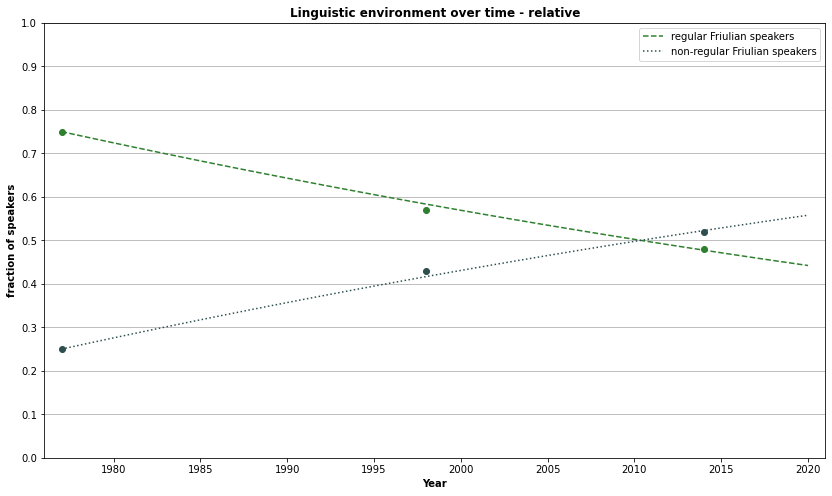

In [53]:
plot_trajectory_relative(traj_old_regular, 
                         data_old_regular,
                         "regular Friulian",
                         fname="plots/old_relative_regular.png")

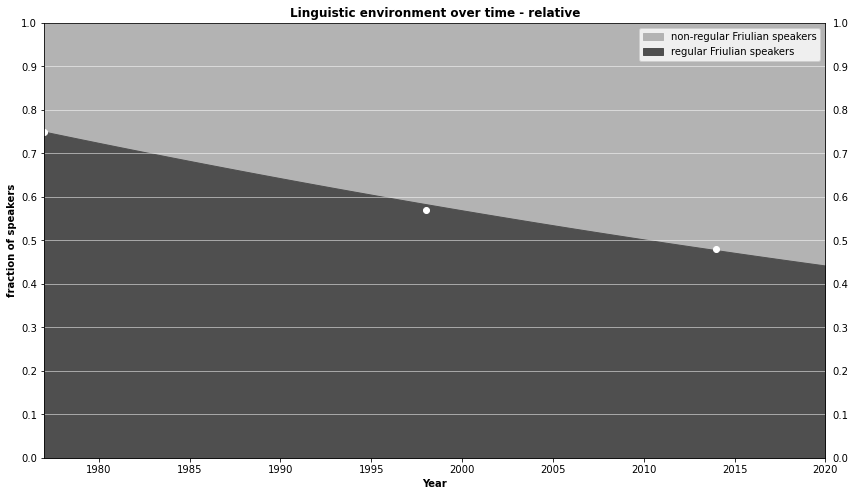

In [54]:
plot_trajectory_relative_fill(traj_old_regular, 
                              data_old_regular,
                              "regular Friulian",
                              fname="plots/old_relative_filled_regular.png")

### annual decline

In [55]:
1 - traj_old_regular[3,1:] / traj_old_regular[3,0:-1]

array([0.011565  , 0.01159987, 0.01163444, 0.01166871, 0.01170268,
       0.01173635, 0.01176973, 0.0118028 , 0.01183558, 0.01186806,
       0.01190025, 0.01193214, 0.01196373, 0.01199503, 0.01202604,
       0.01205675, 0.01208717, 0.01211731, 0.01214715, 0.0121767 ,
       0.01220596, 0.01223494, 0.01226363, 0.01229204, 0.01232016,
       0.01234801, 0.01237557, 0.01240285, 0.01242985, 0.01245658,
       0.01248303, 0.0125092 , 0.01253511, 0.01256074, 0.0125861 ,
       0.0126112 , 0.01263603, 0.01266059, 0.01268489, 0.01270893,
       0.01273271, 0.01275623, 0.0127795 ])

In [56]:
2014-1977

37

In [57]:
1-traj_old_regular[3,-7] / traj_old_regular[3,0]

0.36338038718013055

In [58]:
1-47/75

0.3733333333333333

In [59]:
2014-1977

37